About Dataset

Context

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]
Content

Each row represents a customer, each column contains customer's attributes described on the column Metadata.

The data set includes information about:

 * Customers who left within the last month - the column is called Churn
 * Services that each customer has signed up for - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
 * Customer account information - how long they've been a customer, contract, payment method, paperless billing, monthly charges, and total charges
 * Demographic info about customers - gender, age range, and if they have partners and dependents


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
telco = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df = telco.copy()

# Exploring Dataset

In [ ]:
## Customers who left within the last month - the column is called Churn.
## Services that each customer has signed up for - phone, multiple lines, internet, online security, online backup, device protection, tech support,
#  and streaming TV and movies.
## Customer account information - how long they've been a customer, contract, payment method, paperless billing, monthly charges, and total charges
## Demographic info about customers - gender, age range, and if they have partners and dependents
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
print('gender-',df['gender'].unique())
print('SeniorCitizen-',df['SeniorCitizen'].unique())
print('Partner-',df['Partner'].unique())
print('Dependents-',df['Dependents'].unique())
print('tenure-',df['tenure'].unique())
print('MultipleLines-',df['MultipleLines'].unique())
print('InternetService-',df['InternetService'].unique())
print('OnlineSecurity-',df['OnlineSecurity'].unique())
print('OnlineBackup-',df['OnlineBackup'].unique())
print('DeviceProtection-',df['DeviceProtection'].unique())
print('TechSupport-',df['TechSupport'].unique())
print('StreamingTV-',df['StreamingTV'].unique())
print('StreamingMovies-',df['StreamingMovies'].unique())
print('Contract-',df['Contract'].unique())
print('PaperlessBilling-',df['PaperlessBilling'].unique())
print('PaymentMethod-',df['PaymentMethod'].unique())
print('MonthlyCharges-',df['MonthlyCharges'].unique())
print('TotalCharges-',df['TotalCharges'].unique())
print('Churn-',df['Churn'].unique())

gender- ['Female' 'Male']
SeniorCitizen- [0 1]
Partner- ['Yes' 'No']
Dependents- ['No' 'Yes']
tenure- [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
MultipleLines- ['No phone service' 'No' 'Yes']
InternetService- ['DSL' 'Fiber optic' 'No']
OnlineSecurity- ['No' 'Yes' 'No internet service']
OnlineBackup- ['Yes' 'No' 'No internet service']
DeviceProtection- ['No' 'Yes' 'No internet service']
TechSupport- ['No' 'Yes' 'No internet service']
StreamingTV- ['No' 'Yes' 'No internet service']
StreamingMovies- ['No' 'Yes' 'No internet service']
Contract- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling- ['Yes' 'No']
PaymentMethod- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges- [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges- ['29.85' '1889.5' '108

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# I created a new column 'age' by using these three 'SeniorCitizen','Partner','Dependents' for better insight and analysis
# 1st creat a function and then creat a new column 'age'
def chooose(df):
  list1 = []
  for i,j,k,l in zip(df.index,df['SeniorCitizen'],df['Partner'],df['Dependents']):
    if j == 1:
      list1.append('Senior(60-70)')
    elif k == 'Yes' and l == 'No':
      list1.append('Adult(21-30)')
    elif k == 'Yes' and l == 'Yes':
      list1.append('Mid-age(31-59)')
    else:
      list1.append('Young(18-20)')
  return list1

a = chooose(df)
print(a)


['Adult(21-30)', 'Young(18-20)', 'Young(18-20)', 'Young(18-20)', 'Young(18-20)', 'Young(18-20)', 'Young(18-20)', 'Young(18-20)', 'Adult(21-30)', 'Young(18-20)', 'Mid-age(31-59)', 'Young(18-20)', 'Adult(21-30)', 'Young(18-20)', 'Young(18-20)', 'Mid-age(31-59)', 'Young(18-20)', 'Young(18-20)', 'Mid-age(31-59)', 'Young(18-20)', 'Senior(60-70)', 'Adult(21-30)', 'Young(18-20)', 'Adult(21-30)', 'Mid-age(31-59)', 'Young(18-20)', 'Mid-age(31-59)', 'Mid-age(31-59)', 'Adult(21-30)', 'Young(18-20)', 'Senior(60-70)', 'Senior(60-70)', 'Mid-age(31-59)', 'Young(18-20)', 'Senior(60-70)', 'Mid-age(31-59)', 'Young(18-20)', 'Young(18-20)', 'Young(18-20)', 'Young(18-20)', 'Mid-age(31-59)', 'Mid-age(31-59)', 'Mid-age(31-59)', 'Young(18-20)', 'Adult(21-30)', 'Young(18-20)', 'Young(18-20)', 'Young(18-20)', 'Young(18-20)', 'Mid-age(31-59)', 'Senior(60-70)', 'Young(18-20)', 'Senior(60-70)', 'Senior(60-70)', 'Senior(60-70)', 'Senior(60-70)', 'Mid-age(31-59)', 'Senior(60-70)', 'Mid-age(31-59)', 'Young(18-20)', '

In [ ]:
# new column 'age' created in the given dataframe
df['age'] = a
df['age'].isnull().sum()

0

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,age
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Adult(21-30)
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,Young(18-20)
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Young(18-20)
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Young(18-20)
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Young(18-20)


#Question

***
***

1. How many customers are present in the dataset?

In [ ]:
print(f"Number of customers present in the dataset is {df['customerID'].nunique()}")

Number of customers present in the dataset is 7043


***
***

2. What is the distribution of gender among the customers?

In [ ]:
# df.groupby('gender')['customerID'].count()
g = df['gender'].value_counts()
g

Male      3555
Female    3488
Name: gender, dtype: int64

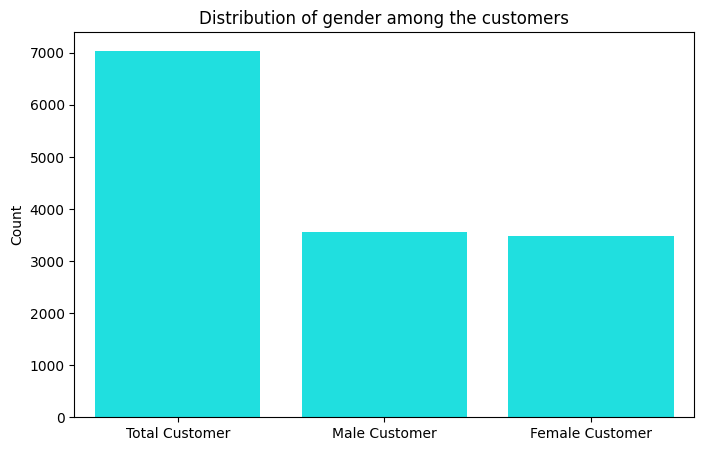

In [ ]:
total_customer = df['gender'].count()
male = df['gender'].value_counts()['Male']
female = df['gender'].value_counts()['Female']

plt.figure(figsize=(8,5))
sns.barplot(x = ['Total Customer', 'Male Customer', 'Female Customer'] , y = [total_customer,male,female],color = "aqua")
plt.ylabel('Count')
plt.title('Distribution of gender among the customers')
plt.show()

***
***

3. How does age vary among the customers?

In [ ]:
age_group = df['age'].value_counts().reset_index()
age_group.columns = ['Age' , 'Count']
age_group

,Age,Count
0,Young(18-20),3072
1,Mid-age(31-59),1666
2,Adult(21-30),1163
3,Senior(60-70),1142


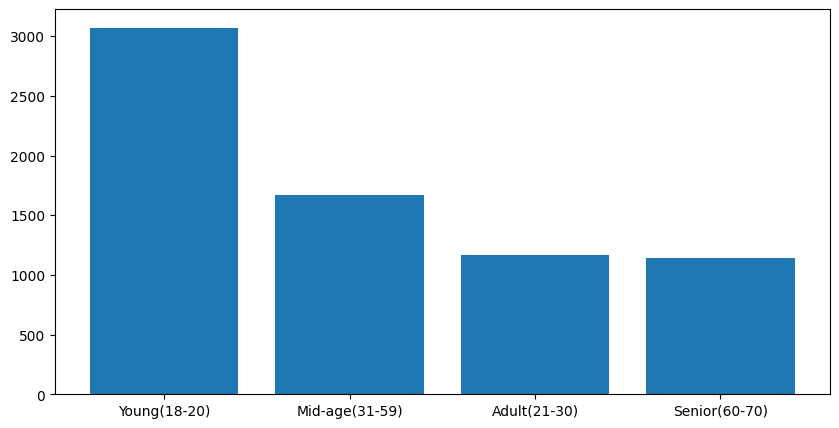

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(age_group['Age'],age_group['Count'])
plt.show()

Here many age group customer are present. like Young(18-20), Adult(21-30) , Middle age(31-59) and SeniorCitizen(above 60) coustomers are present. So we can say that Young and Middle aged customer are more in numbers that other aged group.

***
***

4. What are the different locations from which customers belong?

In [ ]:
# There are no demographic column present in the given dataset on which we find out the location of the customers. so I assume that all customers are come from same location.
# Therefore I creat a location column with considering same values .

df['Location'] = 'Area 1'
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,age,Location
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Adult(21-30),Area 1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,Young(18-20),Area 1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Young(18-20),Area 1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Young(18-20),Area 1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Young(18-20),Area 1


In [ ]:
agewise = df.groupby('Location')['age'].value_counts().unstack()
agewise

age,Adult(21-30),Mid-age(31-59),Senior(60-70),Young(18-20)
Location,,,,
Area 1,1163,1666,1142,3072


In [ ]:
genderwise = df.groupby('Location')['gender'].value_counts().unstack()
genderwise

gender,Female,Male
Location,,
Area 1,3488,3555


Since there are same location as per my assume,but there are verious age group and both genderwise customer are present

***
***

5. How long have customers been using the service on average?

In [ ]:
#Finding Average service tenure for total customers
total_customer_service_tenure = df['tenure'].mean().round(2)
print(f'Average Time for which Customers use the various services is {total_customer_service_tenure} Months')

Average Time for which Customers use the various services is 32.37 Months


In [ ]:
#Finding Average service tenure on 'PhoneService' for customers
avg_phoneservice = df.groupby('PhoneService')['tenure'].mean().round(2)['Yes']
print(f'Average Time for which Customers use the PhoneService service is {avg_phoneservice} Months')

Average Time for which Customers use the PhoneService service is 32.44 Months


In [ ]:
#Finding Average service tenure on 'MultipleLines' for customers
avg_MultipleLines = df.groupby('MultipleLines')['tenure'].mean().round(2)['Yes']
print(f'Average Time for which Customers use the MultipleLines service is {avg_MultipleLines} Months')

Average Time for which Customers use the MultipleLines service is 41.91 Months


In [ ]:
#Finding Average service tenure on 'InternetService' for customers
avg_InternetService_DSL = df.groupby('InternetService')['tenure'].mean().round(2)['DSL']
avg_InternetService_Fiber_optic = df.groupby('InternetService')['tenure'].mean().round(2)['Fiber optic']
print(f'Average Time for which Customers use the InternetService(DSL) service is {avg_InternetService_DSL} Months')
print(f'Average Time for which Customers use the InternetService(Fiber optic) service is {avg_InternetService_Fiber_optic} Months')

Average Time for which Customers use the InternetService(DSL) service is 32.82 Months
Average Time for which Customers use the InternetService(Fiber optic) service is 32.92 Months


In [ ]:
#Finding Average service tenure on 'OnlineSecurity' for customers
avg_OnlineSecurity = df.groupby('OnlineSecurity')['tenure'].mean().round(2)['Yes']
print(f'Average Time for which Customers use the OnlineSecurity service is {avg_OnlineSecurity} Months')

Average Time for which Customers use the OnlineSecurity service is 45.05 Months


In [ ]:
#Finding Average service tenure on 'OnlineBackup' for customers
avg_OnlineBackup = df.groupby('OnlineBackup')['tenure'].mean().round(2)['Yes']
print(f'Average Time for which Customers use the OnlineBackup service is {avg_OnlineBackup} Months')

Average Time for which Customers use the OnlineBackup service is 44.57 Months


In [ ]:
#Finding Average service tenure on 'DeviceProtection' for customers
avg_DeviceProtection = df.groupby('DeviceProtection')['tenure'].mean().round(2)['Yes']
print(f'Average Time for which Customers use the DeviceProtection service is {avg_DeviceProtection} Months')

Average Time for which Customers use the DeviceProtection service is 44.6 Months


In [ ]:
#Finding Average service tenure on 'TechSupport' for customers
avg_TechSupport = df.groupby('TechSupport')['tenure'].mean().round(2)['Yes']
print(f'Average Time for which Customers use the TechSupport service is {avg_TechSupport} Months')

Average Time for which Customers use the TechSupport service is 44.82 Months


In [ ]:
#Finding Average service tenure on 'StreamingTV' for customers
avg_StreamingTV = df.groupby('StreamingTV')['tenure'].mean().round(2)['Yes']
print(f'Average Time for which Customers use the StreamingTV service is {avg_StreamingTV} Months')

Average Time for which Customers use the StreamingTV service is 41.07 Months


In [ ]:
#Finding Average service tenure on 'StreamingMovies' for customers
avg_StreamingMovies = df.groupby('StreamingMovies')['tenure'].mean().round(2)['Yes']
print(f'Average Time for which Customers use the StreamingMovies service is {avg_StreamingMovies} Months')

Average Time for which Customers use the StreamingMovies service is 41.2 Months


***
***

6. What is the distribution of subscription types?

In [ ]:
df6 = df['Contract'].value_counts().reset_index()
df6

,index,Contract
0,Month-to-month,3875
1,Two year,1695
2,One year,1473


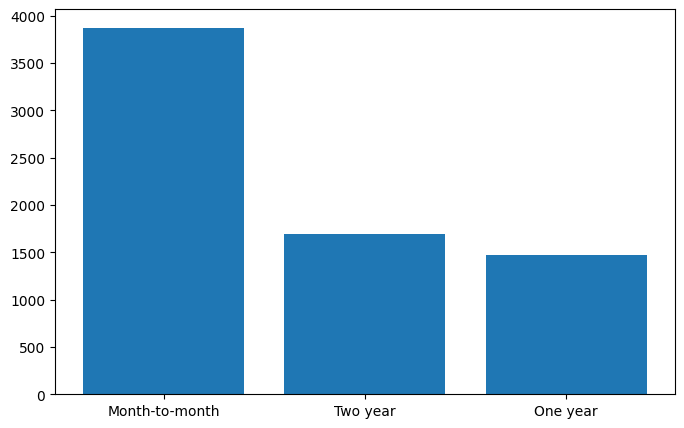

In [ ]:
plt.figure(figsize = (8,5))
plt.bar(df6['index'] , df6['Contract'] , linewidth = 0.4)
plt.show()

Here 'Month-to-month' subscription types is higests which is followed by 'Two year' and 'One year' subscription types.

***
****

7. What is the average monthly charge incurred by customers?

In [ ]:
print(f"The average monthly charge incurred by customers is {df['MonthlyCharges'].mean().round(2)}")

The average monthly charge incurred by customers is 64.76


***
***

8. What is the range of total charges accumulated by customers?

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')
df
df1 = df.copy()
df1 = df1.dropna(subset = 'TotalCharges')
print(f"The range of total charges accumulated by customers is from {df1['TotalCharges'].min()} to {df1['TotalCharges'].max()}")

The range of total charges accumulated by customers is from 18.8 to 8684.8


***
***

9. How many customers have churned?

In [ ]:
print(f"{df['Churn'].value_counts()['Yes']} customers have churned")

1869 customers have churned


****
****

10. What is the churn rate in the dataset?

In [ ]:
total_churn = ((df['Churn'].value_counts()['Yes']/df['Churn'].count())*100).round(2)
print(f'The Churn rate in the dataset is {total_churn}')

The Churn rate in the dataset is 26.54


***
***

11. How does churn vary across different genders?

In [ ]:
print(df.groupby('Churn')['gender'].value_counts())
print('*'*100)
print(df.groupby('gender')['Churn'].value_counts())


Churn  gender
No     Male      2625
       Female    2549
Yes    Female     939
       Male       930
Name: gender, dtype: int64
****************************************************************************************************
gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: Churn, dtype: int64


In [ ]:
#Lets find that out of churned customers how many are male and female
ch = df[df['Churn']=='Yes']
ch_gender = ch.groupby('gender')['Churn'].size().reset_index()
ch_gender.rename(columns={'Churn': 'No._of_cust_churn'}, inplace=True)
ch_gender['Churn_rate'] = (np.round((ch_gender['No._of_cust_churn']*100)/len(df['Churn']),2)).astype(str)+'%'
ch_gender

,gender,No._of_cust_churn,Churn_rate
0,Female,939,13.33%
1,Male,930,13.2%


So,as per observation we can say that churn rate are close to similar for both gender.

***
***

12. Are there any differences in churn based on the customer's age?





In [ ]:
df.groupby('age')['Churn'].value_counts().unstack()

Churn,No,Yes
age,,
Adult(21-30),921,242
Mid-age(31-59),1437,229
Senior(60-70),666,476
Young(18-20),2150,922


So we can see that there are differences in churn based on the customer's age. Here number of churnd(922) is more in Young age group(18-20) customer as compare to othe age group customer

***
***

13.  Are customers from specific locations more likely to churn?

In [ ]:
# Do same things as we do for qus no. 4. and then do analysis on it.

df.groupby('Location')['Churn'].value_counts()

Location  Churn
Area 1    No       5174
          Yes      1869
Name: Churn, dtype: int64

***
***

14. Does the subscription type influence customer churn?

In [ ]:
df.groupby('Contract')['Churn'].value_counts().unstack()

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [ ]:
c_ch = df[(df['Churn']=='Yes')]
pd.crosstab(c_ch.gender, c_ch.Contract, margins=True)

Contract,Month-to-month,One year,Two year,All
gender,,,,
Female,842,75,22,939
Male,813,91,26,930
All,1655,166,48,1869


Yes, as observed from both the table above we can say that subscription type influences the customer churn.

=>Customers with Month-to-month subscription plan are more likely to churn, as compared to customers with other type of subscription plan (One year, Two year).

****
****

15. Is there any correlation between monthly charges and total charges?

In [ ]:
correlation = df.corr()
correlation

<ipython-input-455-b6c2249924d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


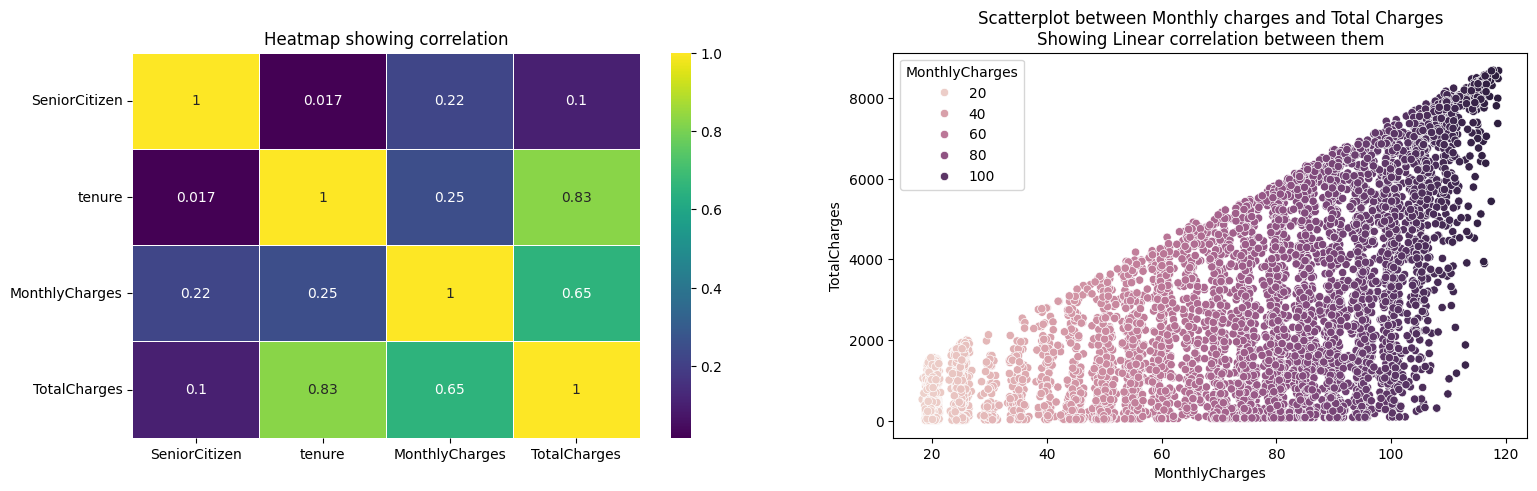

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,5))

sns.heatmap(correlation, cmap='viridis',ax=ax[0] ,annot=True,linewidth=0.5)
ax[0].set_title('Heatmap showing correlation')

sns.scatterplot(x='MonthlyCharges',y='TotalCharges', data=df , ax=ax[1] , hue='MonthlyCharges')
ax[1].set_title('Scatterplot between Monthly charges and Total Charges\nShowing Linear correlation between them')
plt.show()

So Yes, there exist a correlation between monthly charges and total charges

1. Correlation Type -> Linear.

2. Directionality -> Positive.

3. Correleation coefficient -> 0.65

4. Strength of Correlation -> Strong

In [ ]:
Correlation = df['MonthlyCharges'].corr(df['TotalCharges'])
print("Correlation between monthly and total charges is:", Correlation)

Correlation between monthly and total charges is: 0.6510648032262027


****
****